In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Analysis of clusters in sample S3

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

## Preprocessing
### Read data

In [3]:
data_path = "../../data/BacDrop"
data_gene = sc.read_h5ad(data_path + "/untreated_data_processed.h5ad")


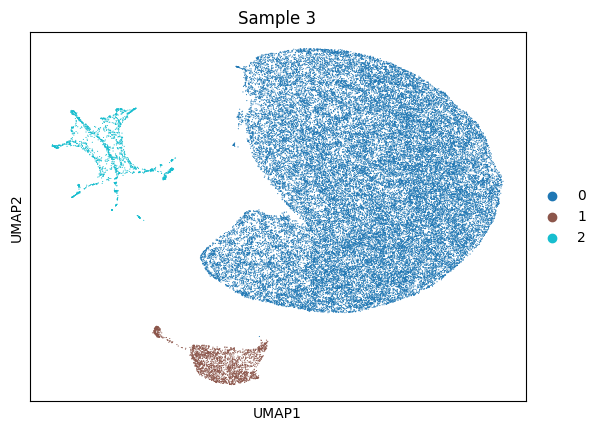

In [17]:
sc.pl.umap(data_gene, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [5]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB a

Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 1300
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZIN

Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 1900
Both NB and ZINB not converged! Using NB without starting params
gene 2000
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 2100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting pa

In [6]:
data_gene.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,means,variances,variances_norm,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
cds-AF52_RS00165,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000074,...,0.000041,0.000041,0.998889,0.000041,0.000041,1.699728e-09,poi,0.000548,inf,0.919963
cds-AF52_RS00180,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000074,...,0.000041,0.000041,0.998889,0.000041,0.000041,1.699728e-09,poi,0.000548,inf,0.919963
cds-AF52_RS00275,27,0.000577,0.000577,99.944343,28.0,3.367296,27,0.000618,False,0.013178,...,0.000577,0.000618,1.026576,0.000577,0.000618,-4.089462e-05,nb,0.000576,0.036261,0.000000
cds-AF52_RS00620,44,0.000928,0.000927,99.909299,45.0,3.828641,44,0.000967,False,0.025466,...,0.000928,0.000968,1.003185,0.000928,0.000968,-4.036728e-05,nb,0.000926,0.022693,0.000000
cds-AF52_RS01000,293,0.006081,0.006063,99.396013,295.0,5.690360,293,0.006126,False,0.173708,...,0.006081,0.006127,0.968473,0.006081,0.006127,-4.547581e-05,nb,0.006081,0.813157,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-WP_187079189.1,95,0.001979,0.001977,99.804168,96.0,4.574711,95,0.002017,False,0.057481,...,0.001979,0.002016,0.982563,0.001979,0.002016,-3.731159e-05,nb,0.001978,0.010619,0.000000
cds-WP_187079192.1,735,0.015378,0.015261,98.484880,746.0,6.616065,735,0.015597,False,0.700161,...,0.015378,0.015595,0.976377,0.015378,0.015595,-2.170239e-04,nb,0.015378,1.089634,0.000000
cds-WP_187079193.1,182,0.003814,0.003806,99.624827,185.0,5.225747,182,0.003965,False,0.123778,...,0.003814,0.003964,1.002033,0.003814,0.003964,-1.503677e-04,nb,0.003823,0.028870,0.000000
cds-WP_187079194.1,93,0.001958,0.001956,99.808291,95.0,4.564348,93,0.002039,False,0.056142,...,0.001958,0.002037,1.003037,0.001958,0.002037,-7.862051e-05,nb,0.001948,0.021523,0.000000


## Find optimal correlation matrix scaling and generate synthetic null data

In [7]:
importlib.reload(cd)
xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
print(xmin)

Factor: 1 - Error: 74.44264336266437
Factor: 2 - Error: 74.24590230050676
Factor: 3.6180339999999998 - Error: 72.3144255272499
Factor: 6.2360680251559995 - Error: 60.69581060557731
Factor: 10.472136091015262 - Error: 42.77242140663865
Factor: 78.47926724311938 - Error: 25.727520314578676
Factor: 188.517117689683 - Error: 26.050021041199606
Factor: 78.47926724311938 - Error: 25.727520314578676
Factor: 120.50998592716999 - Error: 25.21547455506653
Factor: 146.48639869804134 - Error: 25.260753856780607
Factor: 104.45568001399073 - Error: 25.304627684752518
Factor: 130.43209266737279 - Error: 25.28905665201163
Factor: 114.37778675419351 - Error: 25.199084656666425
Factor: 110.58787923184414 - Error: 25.289660850478864
Factor: 116.72007840482064 - Error: 25.354177093143647
Factor: 112.93017089961273 - Error: 25.050118916296785
Factor: 112.03549509701892 - Error: 24.983342474495633
Factor: 111.48255504098542 - Error: 25.084092889202765
Factor: 112.37723084357923 - Error: 25.089697044854343
F

In [17]:
importlib.reload(cd)
xmin=1

# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [18]:
importlib.reload(cd)
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True,
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)

In [19]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [20]:
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

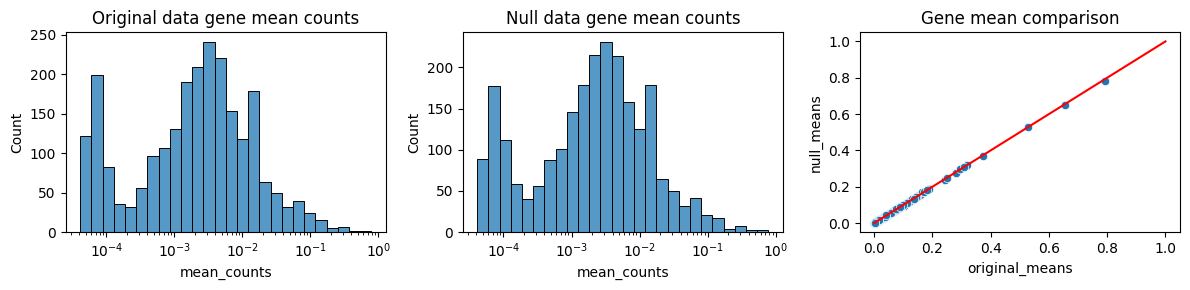

SignificanceResult(statistic=0.9957849575480388, pvalue=0.0)


In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

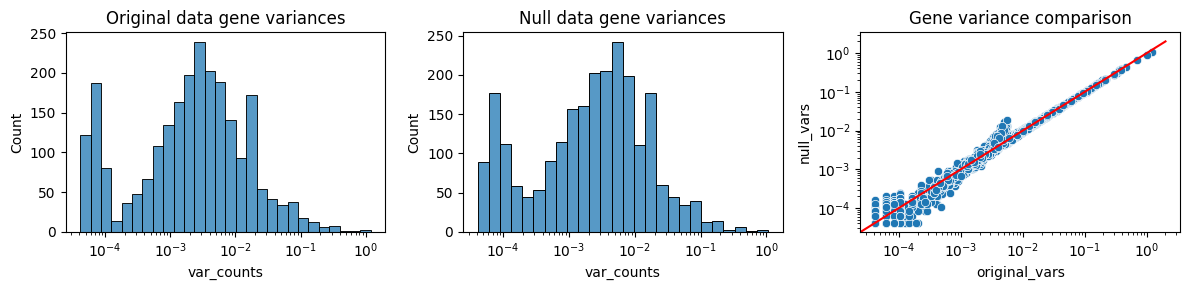

SignificanceResult(statistic=0.9915015995306511, pvalue=0.0)
[[1.         0.99858503]
 [0.99858503 1.        ]]


In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

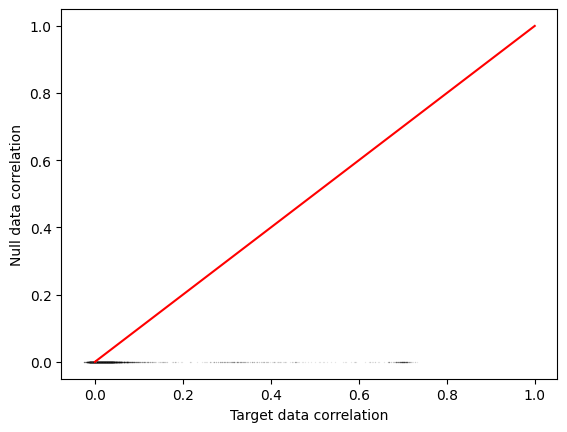

In [23]:
cor_shrink = cd.schaefer_strimmer(data_gene_nonzero.layers["counts"].toarray(), use_corr=True)
cor_shrink = pd.DataFrame(cor_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen_shrink = cd.schaefer_strimmer(data_null_gen.X, use_corr=True)
cor_gen_shrink = pd.DataFrame(cor_gen_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_cors = pd.DataFrame({"cor_shrink": cor_shrink.values.flatten(), "cor_gen_shrink": cor_gen_shrink.values.flatten()})

ids = rng.choice(len(all_cors), 100000, replace=False)
all_cors_subset = all_cors.loc[ids]

sns.scatterplot(all_cors_subset[all_cors_subset['cor_shrink'] < 0.99], x="cor_shrink", y="cor_gen_shrink", s=1,
                color="black", alpha=0.1)
plt.plot([0, np.ceil(np.max(all_cors_subset['cor_shrink']))], [0, np.ceil(np.max(all_cors_subset['cor_shrink']))],
         color="red")
plt.xlabel("Target data correlation")
plt.ylabel("Null data correlation")

plt.show()

### Process null data

In [24]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [25]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform")
data_null_gen.layers["counts"] = data_null_gen.X.copy()

k_opt = data_gene.uns["BacSC_params"]["k_opt"]
n_neighbors_opt = data_gene.uns["BacSC_params"]["n_neighbors_opt"]
min_dist_opt = data_gene.uns["BacSC_params"]["min_dist_opt"]
res_opt = data_gene.uns["BacSC_params"]["res_opt"]
print(n_neighbors_opt)

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


30


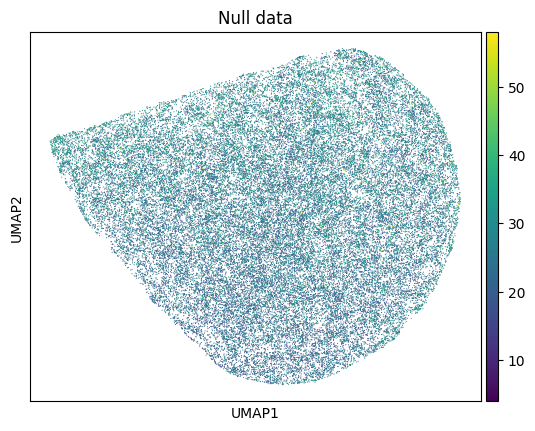

In [26]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [27]:
data_null_gen.write(data_path + "/null_data_untreated.h5ad")

In [5]:
data_null_gen = sc.read_h5ad(data_path + "/null_data_untreated.h5ad")
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

In [11]:
n_splits = 20
rng = np.random.default_rng(2345)
seeds = rng.choice(1000, n_splits)
null_pvals_dict = {}
min_pvals_null = []
c = 0
res_start = 0.01
res_step = 0.01

for s in seeds:
    res2 = res_start
    twoclust = False
    nclust = 1
    was_greater = False
    max_res_1_cluster = 0
    
    while twoclust is False:
        if nclust < 2:
            if res2 > max_res_1_cluster:
                max_res_1_cluster = res2
            elif max_res_1_cluster > 0: 
                res_step = res_step / 2
            if was_greater:
                res2 += res_step
            else:
                res2 += res_step * 5
        else:
            was_greater = True
            min_res_2plus_clusters = res2
            res2 -= res_step
        res2 = np.round(res2, 5)
        sc.tl.leiden(data_null_gen, resolution=res2, key_added=f"leiden_{c}", random_state=s)
        nclust = len(data_null_gen.obs[f"leiden_{c}"].unique())
        if nclust == 2:
            twoclust = True
        print(f"resolution: {res2}, clusters: {nclust}, step: {res_step}")
            
    X_null_gen_0 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] == "0"]
    X_null_gen_1 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] != "0"]
    null_pvals = ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue
    null_pvals_dict[c] = null_pvals

    clusters = data_gene.obs["leiden_opt"].unique()
            
    min_pvals_null.append(np.min(null_pvals))
            
    print(f"split {c+1}/{n_splits} - Resolution {res2}")

    res_start = res2 - 0.05
    c += 1
    
best_split = np.where(min_pvals_null == np.max(min_pvals_null))[0][0]
print(best_split)
print(min_pvals_null[best_split])

resolution: 0.06, clusters: 3, step: 0.01
resolution: 0.05, clusters: 2, step: 0.01
split 1/20 - Resolution 0.05
resolution: 0.05, clusters: 3, step: 0.01
resolution: 0.04, clusters: 2, step: 0.01
split 2/20 - Resolution 0.04
resolution: 0.04, clusters: 1, step: 0.01
resolution: 0.09, clusters: 5, step: 0.01
resolution: 0.08, clusters: 4, step: 0.01
resolution: 0.07, clusters: 3, step: 0.01
resolution: 0.06, clusters: 3, step: 0.01
resolution: 0.05, clusters: 2, step: 0.01
split 3/20 - Resolution 0.05
resolution: 0.05, clusters: 3, step: 0.01
resolution: 0.04, clusters: 2, step: 0.01
split 4/20 - Resolution 0.04
resolution: 0.04, clusters: 2, step: 0.01
split 5/20 - Resolution 0.04
resolution: 0.04, clusters: 1, step: 0.01
resolution: 0.09, clusters: 4, step: 0.01
resolution: 0.08, clusters: 4, step: 0.01
resolution: 0.07, clusters: 4, step: 0.01
resolution: 0.06, clusters: 4, step: 0.01
resolution: 0.05, clusters: 3, step: 0.01
resolution: 0.04, clusters: 1, step: 0.01
resolution: 0.0

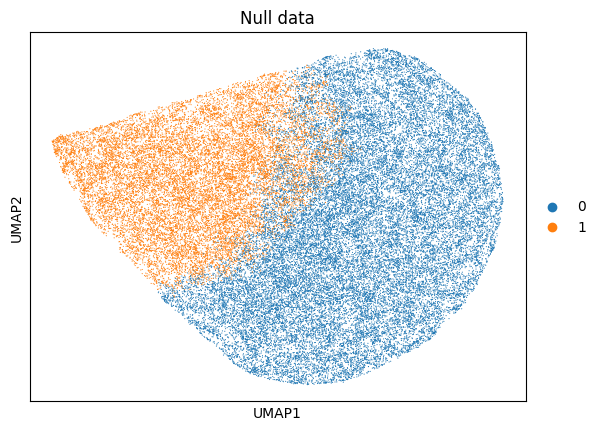

In [16]:
sc.pl.umap(data_null_gen, color=f"leiden_{best_split}", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [13]:
importlib.reload(cd)
clusters = data_gene.obs["leiden_opt"].unique()
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    pvals_data = ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue
    p_data = pd.DataFrame({"pval_data": pvals_data}, index=data_gene_nonzero.var.index)
    pval_null_gen = pd.DataFrame({"pval_null": null_pvals_dict[best_split]}, index=data_null_gen.var.index)
    
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

Cluster 0 - DE genes: 108; Minimum q value: 0.010638297872340425
Cluster 2 - DE genes: 153; Minimum q value: 0.007194244604316547
Cluster 1 - DE genes: 0; Minimum q value: 0.746641074856046


/dss/dsshome1/0A/ra72guj2/BacSC/tools/ClusterDE.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  np.min([(1 / nnull + 1 / nnull * np.sum(contrastScore <= -t)) / np.sum(contrastScore >= t), 1]))


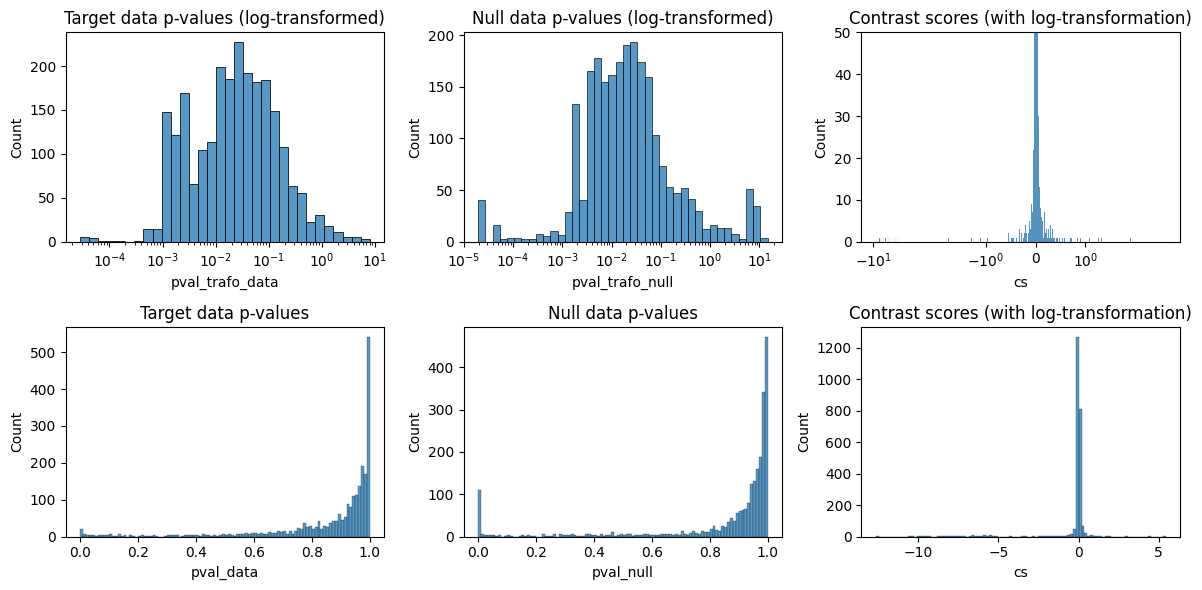

In [15]:
c = "1"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_trafo_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_trafo_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog", ylim=(0, 50))

sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (with log-transformation)")


plt.tight_layout()
plt.show()

In [18]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 0
0.010638      94
0.019417       9
0.037736       3
0.046296       2
0.051282       9
            ... 
0.741202       3
0.751644       5
0.752555       1
0.757112       1
1.000000    1038
Name: q, Length: 178, dtype: int64

cluster 2
0.007194     139
0.013333      11
0.019737       2
0.032680       1
0.070513       3
            ... 
0.746686       4
0.747059       2
0.759735       1
0.765957       2
1.000000    1046
Name: q, Length: 212, dtype: int64

cluster 1
0.746641     521
0.747126       1
0.747170       8
0.754682       4
0.755140       1
            ... 
0.973532       2
0.975268       4
0.978583       1
0.983539       1
1.000000    1194
Name: q, Length: 83, dtype: int64



In [23]:
pvals_log_gen["1"]

,pval_data,pval_null,pval_trafo_data,pval_trafo_null,cs,q
cds-WP_002919759.1,2.629134e-07,7.074669e-02,6.580187,1.150294,5.429893,0.746641
cds-WP_002884146.1,8.753329e-09,2.071121e-03,8.057827,2.683794,5.374032,0.746641
cds-WP_004147333.1,2.181445e-05,5.935931e-01,4.661256,0.226511,4.434744,0.746641
cds-WP_002919796.1,6.152046e-06,7.013017e-03,5.210980,2.154095,3.056885,0.746641
cds-WP_002888731.1,2.981990e-04,3.075054e-01,3.525494,0.512147,3.013346,0.746641
...,...,...,...,...,...,...
cds-WP_013815099.1-14,5.778717e-01,7.314420e-11,0.238169,10.135820,-9.897652,1.000000
cds-WP_013815099.1-5,7.551252e-01,6.965456e-11,0.121981,10.157050,-10.035069,1.000000
cds-WP_013815099.1-23,3.542805e-01,1.569933e-11,0.450653,10.804119,-10.353466,1.000000
cds-WP_002898162.1,8.970858e-05,1.972006e-15,4.047166,14.705092,-10.657926,1.000000


In [20]:
data_gene_nonzero.uns["ClusterDE_results"] = pvals_log_gen

data_gene_nonzero.uns["ClusterDE_results"]['params'] = {'groupby': 'leiden_opt',
  'reference': 'rest',
  'use_raw': False,
  'layer': None,
}

In [21]:
data_gene_nonzero.write(data_path + "/untreated_data_processed_cluster.h5ad")

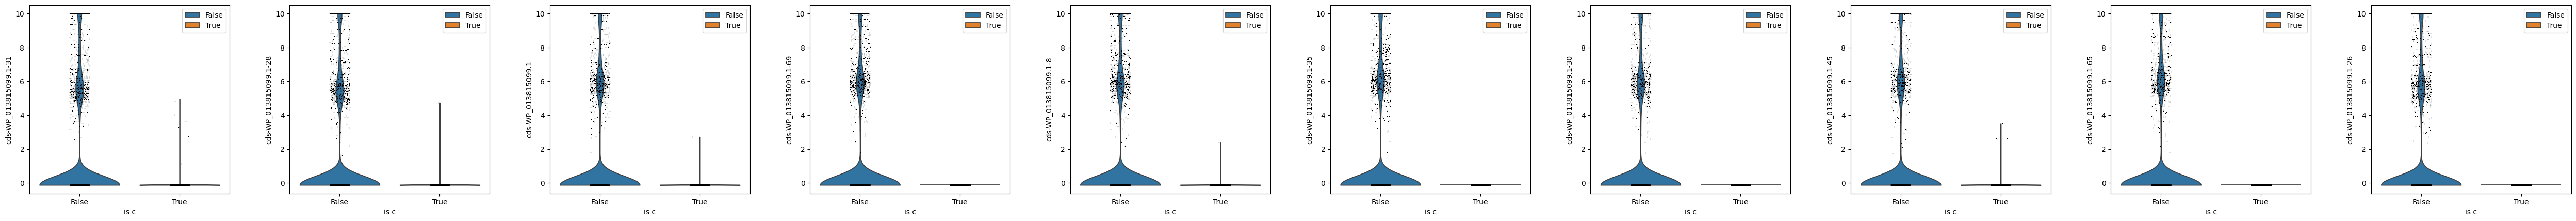

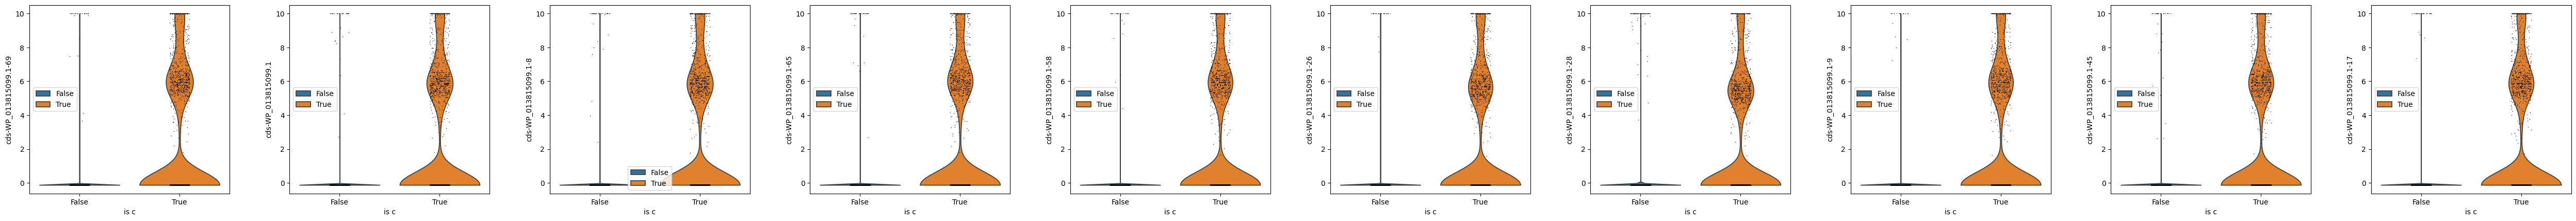

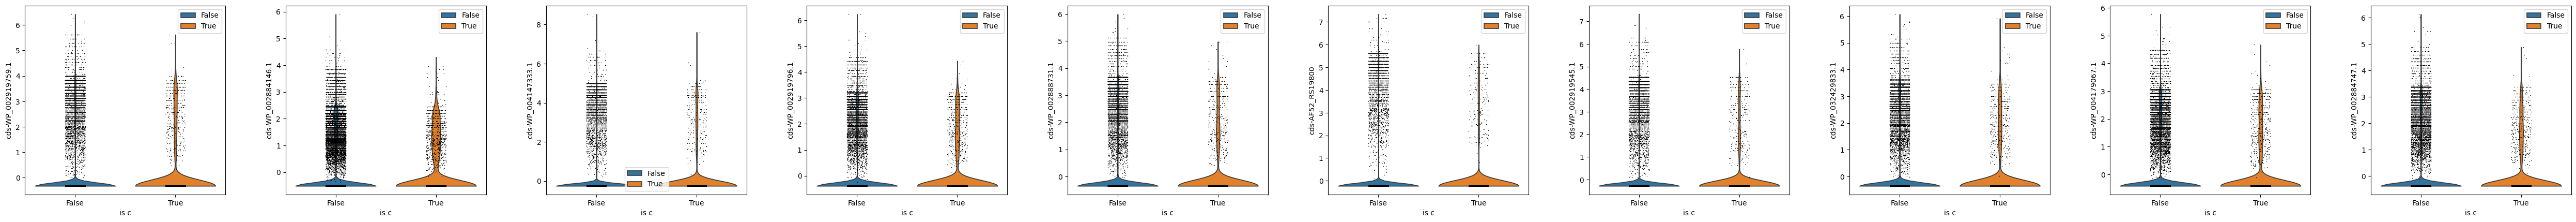

In [24]:
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:10,:].index.tolist()
    data_gene_nonzero.obs["is_c"] = pd.Categorical([x==c for x in data_gene_nonzero.obs["leiden_opt"]])
    with plt.rc_context({"figure.figsize": (5, 5)}):
        sc.pl.violin(data_gene_nonzero, keys=plot_genes, groupby="is_c", multi_panel=True)

In [25]:
data_gene.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,highly_variable,highly_variable_rank,means,variances,variances_norm,lt,locus_tag,product_accession,name,symbol
cds-AF52_RS00165,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000074,...,True,1185.0,0.000041,0.000041,0.998889,AF52_RS00165,AF52_RS00165,NaN,diguanylate cyclase,NaN
cds-AF52_RS00180,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000074,...,True,1353.0,0.000041,0.000041,0.998889,AF52_RS00180,AF52_RS00180,NaN,PTS transporter subunit EIIC,NaN
cds-AF52_RS00275,27,0.000577,0.000577,99.944343,28.0,3.367296,27,0.000618,False,0.013178,...,True,606.0,0.000577,0.000618,1.026576,AF52_RS00275,AF52_RS00275,WP_228690243.1,integrase arm-type DNA-binding domain-containi...,NaN
cds-AF52_RS00620,44,0.000928,0.000927,99.909299,45.0,3.828641,44,0.000967,False,0.025466,...,True,1072.0,0.000928,0.000968,1.003185,AF52_RS00620,AF52_RS00620,NaN,sugar ABC transporter ATP-binding protein,NaN
cds-AF52_RS01000,293,0.006081,0.006063,99.396013,295.0,5.690360,293,0.006126,False,0.173708,...,True,2354.0,0.006081,0.006127,0.968473,AF52_RS01000,AF52_RS01000,NaN,IS5/IS1182 family transposase,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-WP_187079189.1,95,0.001979,0.001977,99.804168,96.0,4.574711,95,0.002017,False,0.057481,...,True,1828.0,0.001979,0.002016,0.982563,WP_187079189.1,AF52_RS17360,WP_187079189.1,ribonuclease D,rnd
cds-WP_187079192.1,735,0.015378,0.015261,98.484880,746.0,6.616065,735,0.015597,False,0.700161,...,True,2137.0,0.015378,0.015595,0.976377,WP_187079192.1,AF52_RS13615,WP_187079192.1,IS5-like element IS903B family transposase,NaN
cds-WP_187079193.1,182,0.003814,0.003806,99.624827,185.0,5.225747,182,0.003965,False,0.123778,...,True,1096.0,0.003814,0.003964,1.002033,WP_187079193.1,AF52_RS10770,WP_187079193.1,aspartate aminotransferase family protein,NaN
cds-WP_187079194.1,93,0.001958,0.001956,99.808291,95.0,4.564348,93,0.002039,False,0.056142,...,True,1079.0,0.001958,0.002037,1.003037,WP_187079194.1,AF52_RS10645,WP_187079194.1,ribokinase,rbsK


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


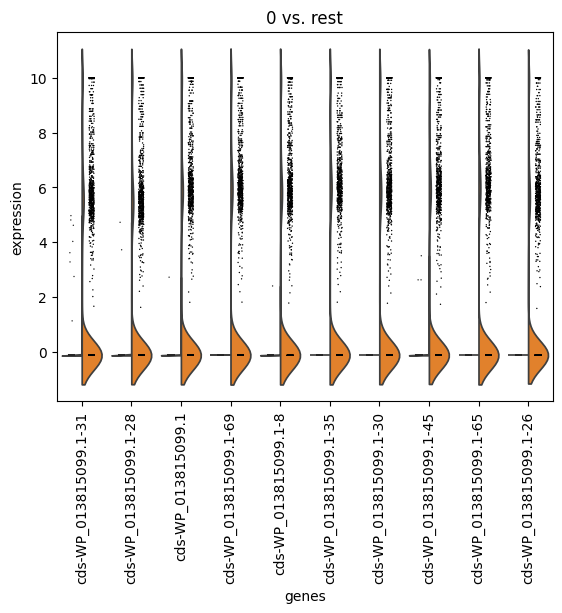

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


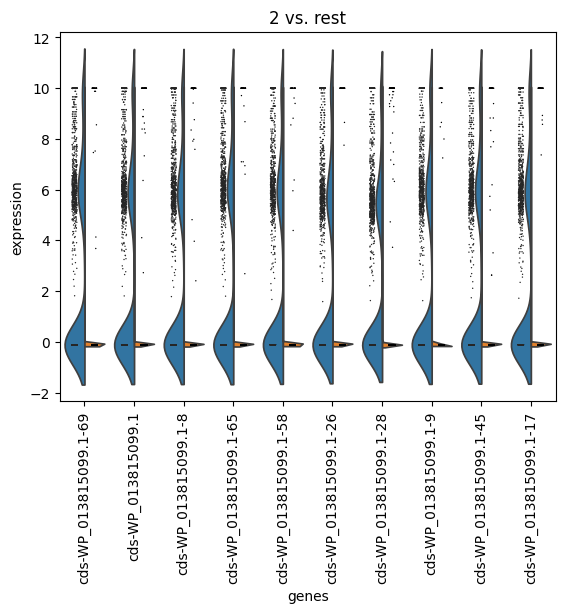

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


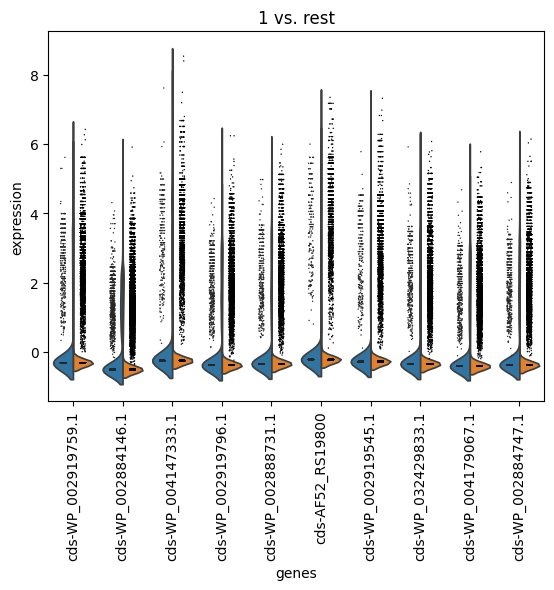

In [26]:
n_genes = 10
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    sc.pl.rank_genes_groups_violin(data_gene_nonzero, gene_names=plot_genes, key="ClusterDE_results", groups=c)

In [28]:
all_marker_genes = []
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    all_marker_genes += plot_genes
    print(f"Cluster {c}")
    print(data_gene.var.loc[plot_genes, ["locus_tag", "name", "symbol"]])

Cluster 0
                          locus_tag  \
cds-WP_013815099.1-31  AF52_RS22855   
cds-WP_013815099.1-28  AF52_RS22855   
cds-WP_013815099.1     AF52_RS22855   
cds-WP_013815099.1-69  AF52_RS22855   
cds-WP_013815099.1-8   AF52_RS22855   
cds-WP_013815099.1-35  AF52_RS22855   
cds-WP_013815099.1-30  AF52_RS22855   
cds-WP_013815099.1-45  AF52_RS22855   
cds-WP_013815099.1-65  AF52_RS22855   
cds-WP_013815099.1-26  AF52_RS22855   

                                                             name symbol  
cds-WP_013815099.1-31  IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-28  IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1     IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-69  IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-8   IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-35  IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-30  IS5-like ele

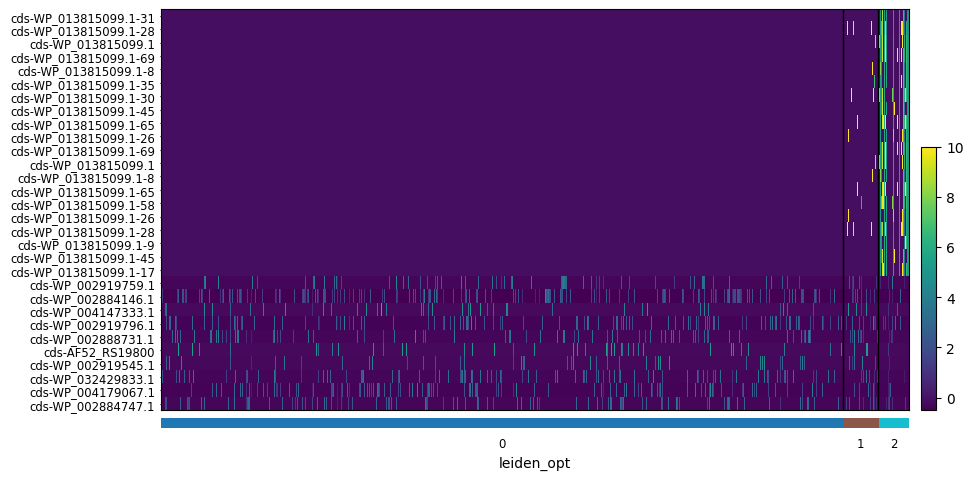

In [29]:
sc.pl.heatmap(data_gene_nonzero, all_marker_genes, groupby='leiden_opt', swap_axes=True)